In [1]:
!jt -t grade3 -ofs 18 -nfs 18 -tfs 24 -T

# ANN Building Blocks part 3

# Back-propagation

 ##### Recall the  training algorithm
 1. Initialize weights and biases randomly $\sim N(0, \sigma^2)$
 2. Loop for $M$ epochs or until convergence:
     - For each weight $w_{i,j}$ and each bias $b_j$ :
         1. <span style="background-color:yellow">Compute partial derivatives (gradients)</span>
         2. Update weights and biases
         \end{eqnarray}$
 3. Return final weights and biases
         

#### Back-propagation (BP) is 

- a Dynamic Programming algorithm for gradient descent in ANNs
- performed in each iteration/epoch

#### Gradient descents is about derivatives

- There's a lot of derivatives in an ANN
- BP allows us to compute them efficiently

#### BP builds on the chain rule of Differentiation

- Let's get a reminder of the chain rule

<font size=5, color=darkgrey> *(Note: Differentiation means "taking the derivative")*</font>

# Chain rule of derivation
##### A reminder


The chain rule simplifies derivation of complex functions and states that

$$\frac{d f(g(x))}{dx} = \frac{df(g(x))}{dg(x)} \times \frac{dg(x)}{d x} $$

Let $t=g(x)$, then
$$\frac{d f(g(x))}{dx} =\frac{d f(t)}{dx} = \frac{df(t)}{dt} \times \frac{dt}{dx}$$

<br>
<br>

##### An example

$f(g(x)) =\frac{1}{2}(y-x)^2$

$t = g(x) = y-x$

$f(t) = \frac{1}{2}t^2$

\begin{eqnarray}
\frac{d f(x)}{dx} &=& \frac{1}{2}\frac{d f(t)}{dt}\times\frac{d t}{dx}\\
%&=& \frac{1}{2}\frac{d f(t)}{dt}\times\frac{d g(x)}{dx}\\
&=& \frac{1}{2}\frac{d t^2}{dt}\times\frac{d (y-x)}{dx}\\
&=& \frac{2t}{2} \times -1\\
&=& (y-x) \times -1\\
&=& x-y
\end{eqnarray}


# Chain rule of derivation
##### A reminder


The chain rule simplifies derivation of complex functions and states that

$$\frac{d f(g(x))}{dx} = \frac{df(g(x))}{dg(x)} \times \frac{dg(x)}{d x} $$

Let $t=g(x)$, then
$$\frac{d f(g(x))}{dx} =\frac{d f(t)}{dx} = \frac{df(t)}{dt} \times \frac{dt}{dx}$$

<br>
<br>

##### Another example

The derivative of the sigmoid function:

$$\begin{eqnarray*}
\sigma(x) = f(g(x)) &=& \frac{1}{1+e^{-x}}\\
\\
t &=& g(x) = 1+e^{-x}\\
\\
f(t) &=& \frac{1}{t} = t ^{-1}
\end{eqnarray*}$$

$$\begin{eqnarray*}
\frac{d\sigma(x)}{d x}
&=& \frac{d f(t)}{d t} \quad\times\quad \frac{d t}{d x}\\
&=& \frac{d t^{-1}}{d t} \quad\times\quad \frac{d 1-e^{-x}}{d x}\\
&=& -t^{-2} \quad\times\quad e^{-x}\\
&=& \frac{1}{\left(1+e^{-x}\right)^{2}} \times e^{-x}\\
&=& \frac{1}{\left(1+e^{-x}\right)} \frac{e^{-x}}{\left(1+e^{-x}\right)}\\
&=& \frac{1}{1+e^{-x}}\quad \left(1-\frac{1}{1+e^{-x}}\right)\\\\
&=& \sigma(x)\left(1-\sigma(x)\right)
\end{eqnarray*}$$

#### The chain rule works just as well on partial derivatives

# Back propagation strategy

Use chain rule to split $\frac{L(b,w|x)}{\partial v}$ on $z$ and $a$ of each layer.

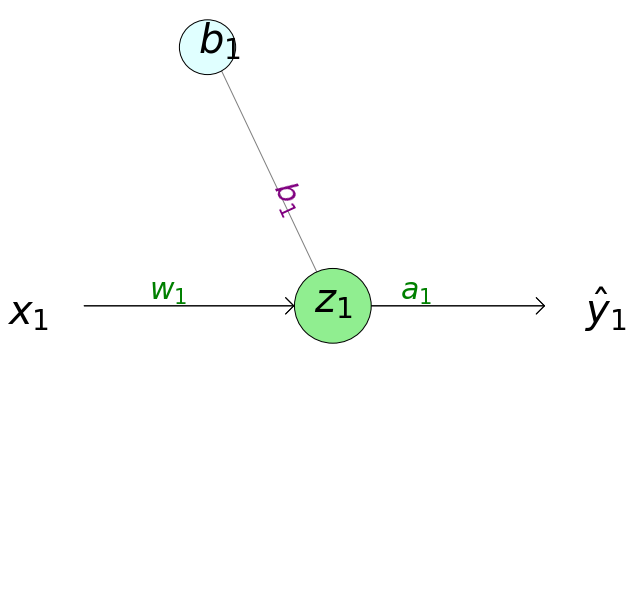

In [5]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..', 'common_assets')))
from draw_neural_net import draw_neural_net

#-----1-1-1
layer_sizes = [1,1,1]

weights = [
    np.array(
        [
            [ "w_1"],
        ]
    ),
    np.array(
        [
            [ "a_1"],
        ]
    )
]
biases = [
    np.array(
        ["b_1"]
    ), 
    np.array(
        ["b_2"]
    )
]

figBP = plt.figure(figsize=(11, 11))
ax = figBP.gca()

ignore=ax.axis('off')

draw_neural_net(ax, 0,1.,0, 1.,
                layerSizes=layer_sizes, 
                weights=weights, biases=biases, 
                otherNodePrefix="z_{m}",
                hiddenLayerPrefix = "", outLayerPrefix = "", inLayerPrefix ="",
                hideInOutPutNodes=True, 
                edgeFontSize = 30, nodeFontSize = 40)
#fig.savefig('nn_digar00am.png')
plt.show()

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_1} &=&  \frac{\partial z_1}{\partial w_1}\times \frac{\partial a_1}{\partial z_1} \times \frac{\partial L(w,b|x)}{\partial a_1} 
\end{eqnarray}$

# Mini exercise

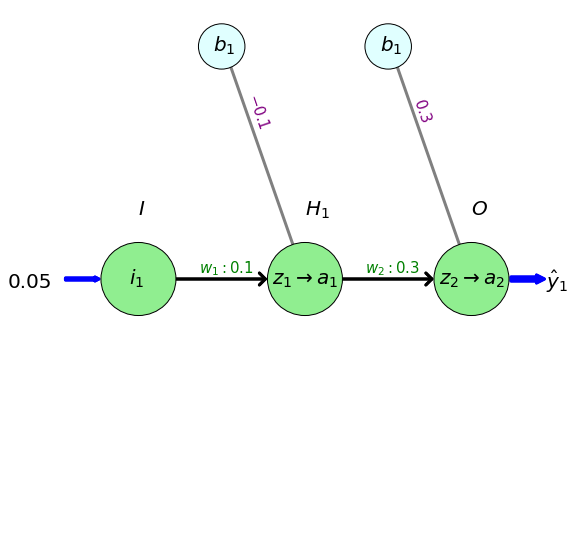

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from draw_neural_net import draw_neural_net

def sigma(z):
  return 1/(1+np.exp(-z))

#-----1-1-1
layer_sizes = [1,1,1]

x= 0.05
y = 0.1
i1 = x
w1 = 0.1
w2=0.3
b1 = -0.10
b2 = 0.30
z1 = w1*i1+b1
a1 = sigma(z1)
z2 = w2*a1+b2
a2 = sigma(z2)
C = 0.5 * (y-a2)**2
# z1 = round(z1, 2)
# a1 = round(a1, 2)
# z2 = round(z2, 2)
# a2 = round(a2, 2)
# C = round(C,2)

eta = 0.3

dcda2 = a2-y
da2dz2= a2*(1-a1)
dcdz2 = dcda2 * da2dz2
dz2da1 = w2
dcda1 = dcdz2 * dz2da1
da1dz1 = a1*(1-a1)
dcdz1 = dcdz2 * dz2da1
dz1dw1 = x
dcdw1 = dcdz1 * dz1dw1

wnew = w1 - eta * dcdw1

weights = [
    np.array(
        [
            ["w_1:{}".format(w1)]
         ]
    ),
    np.array(
        [
            [ "w_2:{}".format(w2)]
        ]
    )
]
biases = [
    np.array(
        ["{}".format(b1)]
    ), 
    np.array(
        ["{}".format(b2)]
    )
]

hidden = [
                np.array(
                [ r"$i_1$"]
                ),
                np.array(
                [ r"$z_1\rightarrow a_1$"]
                ),
                np.array(
                [ r"$z_2\rightarrow a_2$"]
                ),
]

figExercise = plt.figure(figsize=(10, 10))
ax = figExercise.gca()
ignore=ax.axis('off')

draw_neural_net(ax, 
                layerSizes = layer_sizes, 
                weights = weights, 
                otherNodePrefix = hidden,
                biases=biases, 
                inputPrefix = ["{}".format(x)], 
                nodeFontSize=20, edgeFontSize = 15, edgeWidth = 3
               )
#plt.show()

### Forward pass
$\begin{eqnarray}
z_j &=&  w_j a_{j-1} + b_j\\
a_j &=& \sigma(z_j) = \frac{1}{1+e^{-z_j}}
\end{eqnarray}$
- *hint!*: to compute $\sigma(z)$, use, e.g.
```
import tensorflow as tf
tf.sigmoid(z)
``` 



In [7]:
import pandas as pd

props1 = [
    ("font-size", "24px")
]

props2 = [
    ("font-size", "18px")
]
styles = [
    dict(selector="th", props = props1),
    dict(selector="td", props=props1)
]
styles2 = [
    dict(selector="th", props = props2),
    dict(selector="td", props=props2)
]

tab = pd.DataFrame(
    { 
        "x" : [format(x, ".2g")],
        "y" : [format(y, ".2g")],
        "i1" : [""], 
        "z1" : [""], 
        "a1" : [""], 
        "z2" : [""],
        "a2" : [""],
        "haty" : [""],
        "C" : [""]
    }
)


colNames = { 
        "x" : r"$x$",
        "y" : r"$y$",
        "i1" : r"$i_1$", 
        "z1" : r"$z_1$", 
        "a1" : r"$a_1$",
        "z2" : r"$z_2$",
        "a2" : r"$a_2$",
        "haty" : r"$\hat{y}$",
        "C" : "$L(w,b|x)$"
}

pd.DataFrame.rename(tab,columns = colNames).style.hide_index().set_table_styles(styles)
#set_table_attributes('style="font-size: 14px"')
#html = (df.style.set_table_styles([{'selector': 'th', 'props': [('font-size', '5pt')]}]).set_properties(**{'font-size': '10pt'}).render()24

$x$,$y$,$i_1$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,,,,,,,


# Mini exercise

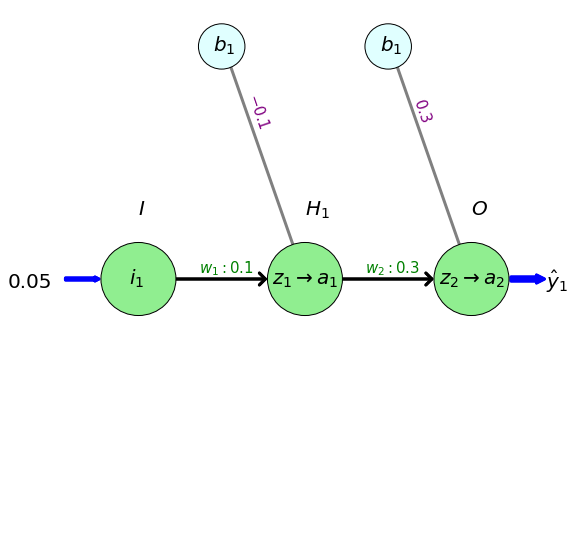

In [5]:
figExercise

### Forward pass
$\begin{eqnarray}
z_j &=&  w_j a_{j-1} + b_j\\
a_j &=& \sigma(z_j) = \frac{1}{1+e^{-z_j}}
\end{eqnarray}$
- *hint!*: to compute $\sigma(z)$, use, e.g.
```
import tensorflow as tf
tf.sigmoid(z)
```

In [8]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.rendered_html td { white-space: pre; }</style>"))

tab["z1"] = [format(z1, ".2g")]
tab["i1"] = [format(x, ".2g")]
tab["a1"] = [format(a1, ".2g")]
tab["z2"] = [format(z2, ".2g")]
tab["a2"] = [format(a2, ".2g")]
tab["haty"] = [format(a2, ".2g")]
tab["C"] = [format(C, ".2g").ljust(20, ".")]
#tab["C"] = tab["C"].str.pad(20, "right")
#tab.style.set_properties(subset=['C'], **{'width': '1300px'})

pd.DataFrame.rename(tab,columns = colNames).style.hide_index().set_table_styles(styles)
#pd.DataFrame.rename(tab,columns = colNames).\
#style.hide_index().\
#set_table_attributes('style="font-size: 8px"')
#.style.set_properties(subset=['C'], **{'width-min': '300px'})
#.applymap(lambda x: str(x).ljust(2000))
#format(C, ".2g").rjust(6," ")
#xtab.dtypes

$x$,$y$,$i_1$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,0.05,-0.095,0.48,0.44,0.61,0.61,0.13................


# Mini exercise

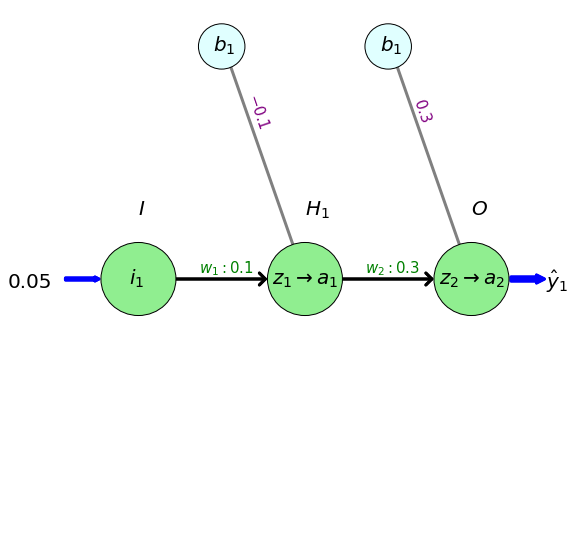

In [7]:
figExercise

### Backward pass 1
$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial a_2} 
&=&  \frac{\partial \frac{1}{2}(y-a_2)^2}{\partial a_2} \\
&=& ?
\end{eqnarray}$

In [8]:
tab1=pd.DataFrame.rename(tab,columns = colNames).\
style.hide_index().\
set_table_styles(styles2)
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [12]:
tab2 = pd.DataFrame(
    { 
        "wnew" : ["   "],
        "dcdw1" : ["   "],
        "dz1dw1" : ["   "],
        "dcdz1" : ["   "], 
        "da1dz1" : ["   "], 
        "dcda1" : ["   "],
        "dz2da1" : ["   "],
        "dcdz2" : ["   "],
        "da2dz2" : ["   "],
        "dcda2" : ["   "],
    }
)


colNames = { 
        "wnew" : r"$w'_1$",
        "dcdw1" : r"$\frac{\partial L(w,b|x)}{\partial w_1}$",
        "dz1dw1" : r"$\frac{\partial z_1}{\partial w_1}$",
        "dcdz1" : r"$\frac{\partial L(w,b|x)}{\partial z_1}$",
        "da1dz1" : r"$\frac{\partial a_1}{\partial z_1}$",
        "dcda1" : r"$\frac{\partial L(w,b|x)}{\partial a_1}$",
        "dz2da1" : r"$\frac{\partial z_2}{\partial a_1}$",
        "dcdz2" : r"$\frac{\partial L(w,b|x)}{\partial z-2}$",
        "da2dz2" : r"$\frac{\partial a_2}{\partial z_2}$",
        "dcda2" : r"$\frac{\partial L(w,b|x)}{\partial a_2}$",

    }

pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,,,


# Mini exercise

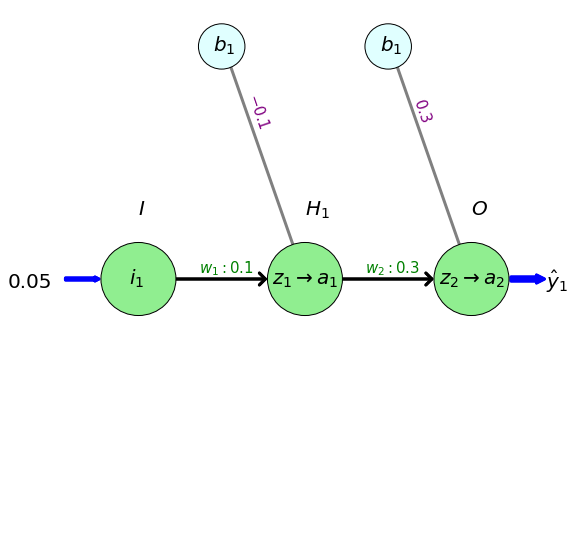

In [10]:
figExercise

### Backward pass 1
$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial a_2} 
&=&  \frac{\partial \frac{1}{2}(y-a_2)^2}{\partial a_2} \\
&=& a_2 -y
\end{eqnarray}$

In [11]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [13]:

pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,,,


# Mini exercise

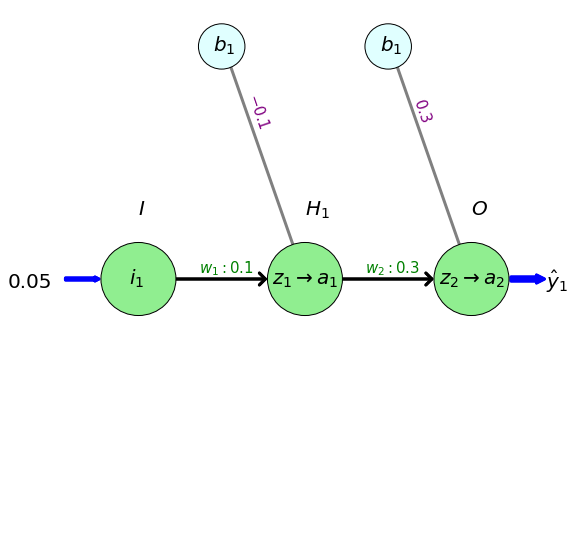

In [10]:
figExercise

### Backward pass 1
$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial a_2} 
&=&  \frac{\partial \frac{1}{2}(y-a_2)^2}{\partial a_2} \\
&=& a_2 -y
\end{eqnarray}$

In [11]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [12]:
tab2["dcda2"] = [format(dcda2, ".2g").ljust(13, ".")]
stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,,,0.51.........


# Mini exercise

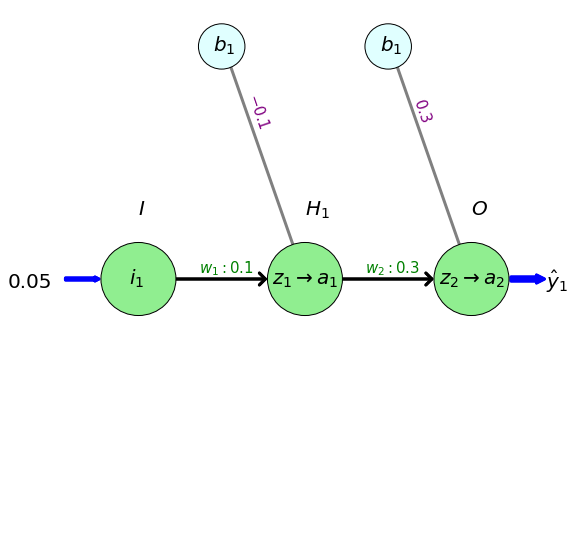

In [13]:
figExercise

### Backward pass 2
$\begin{eqnarray}
\frac{\partial a_2}{\partial z_2} 
&=&  \frac{\partial \sigma(z)}{\partial a}\\
\\
&=& ?\\
\\
\frac{\partial L(w,b|x)}{\partial z_2} 
&=&  ?
\end{eqnarray}$

In [14]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [15]:
tab2["dcda2"] = [format(dcda2, ".2g").ljust(13, ".")]
stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,,,0.51.........


# Mini exercise

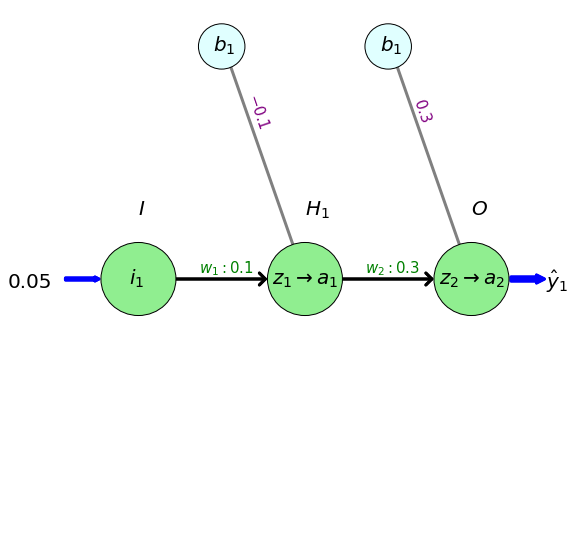

In [13]:
figExercise

### Backward pass 2
$\begin{eqnarray}
\frac{\partial a_2}{\partial z_2} 
&=&  \frac{\partial \sigma(z)}{\partial a}\\
&=& \sigma(z)(1-\sigma(z))\\
\\
\frac{\partial L(w,b|x)}{\partial z_2} 
&=&  \frac{\partial a_2}{\partial z_2} \times \frac{\partial L(w,b|x)}{\partial a_2}
\end{eqnarray}$

In [14]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [15]:
tab2["dcda2"] = [format(dcda2, ".2g").ljust(13, ".")]
stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,,,0.51.........


# Mini exercise

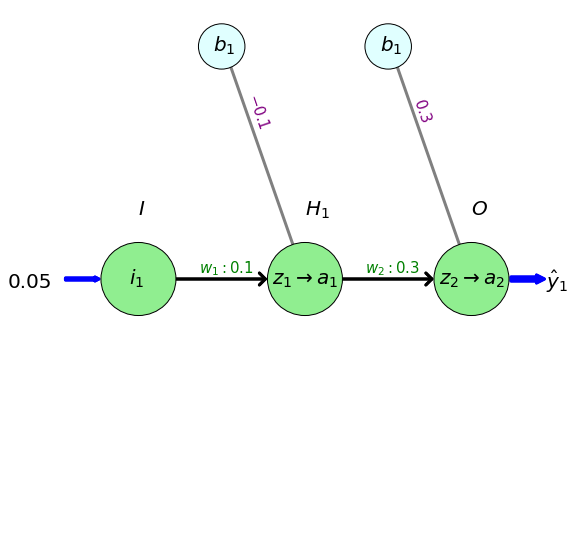

In [16]:
figExercise

### Backward pass 2
$\begin{eqnarray}
\frac{\partial a_2}{\partial z_2} 
&=&  \frac{\partial \sigma(z)}{\partial a}\\
&=& \sigma(z)(1-\sigma(z))\\
\\
\frac{\partial L(w,b|x)}{\partial z_2} 
&=&  \frac{\partial a_2}{\partial z_2} \times \frac{\partial L(w,b|x)}{\partial a_2}
\end{eqnarray}$

In [17]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [18]:
tab2["da2dz2"] = [format(da2dz2, ".2g").ljust(6, ".")]
tab2["dcdz2"] = [format(dcdz2, ".2g").ljust(13, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,0.16.........,0.32..,0.51.........


# Mini exercise

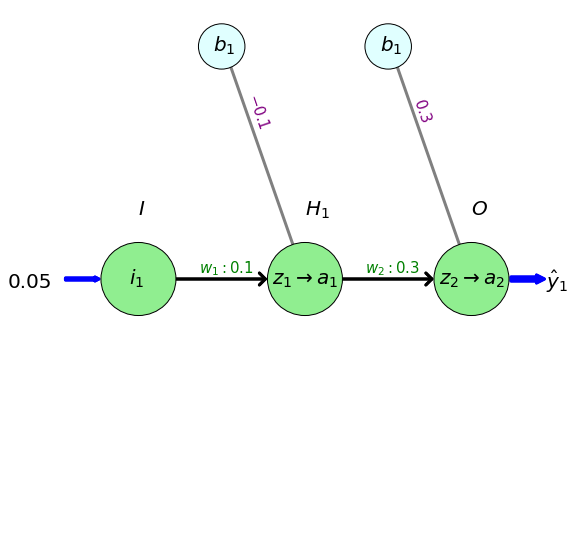

In [19]:
figExercise

### Backward pass 3
$\begin{eqnarray}
\frac{\partial z_2}{\partial a_1} 
&=&  \frac{\partial w_2*a_1+b_1}{\partial a} = ?\\
\\
\frac{\partial L(w,b|x)}{\partial a_1} 
&=&  \frac{\partial z_2}{\partial a_1} \times \frac{\partial L(w,b|x)}{\partial z_2}
\end{eqnarray}$

In [20]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [21]:
tab2["da2dz2"] = [format(da2dz2, ".2g").ljust(6, ".")]
tab2["dcdz2"] = [format(dcdz2, ".2g").ljust(13, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,0.16.........,0.32..,0.51.........


# Mini exercise

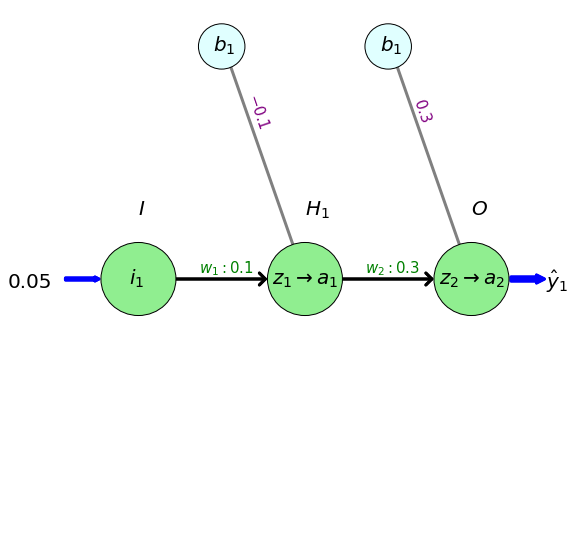

In [19]:
figExercise

### Backward pass 3
$\begin{eqnarray}
\frac{\partial z_2}{\partial a_1} 
&=&  \frac{\partial w_2*a_1+b_1}{\partial a} = w_2\\
\\
\frac{\partial L(w,b|x)}{\partial a_1} 
&=&  \frac{\partial z_2}{\partial a_1} \times \frac{\partial L(w,b|x)}{\partial z_2}
\end{eqnarray}$

In [20]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [21]:
tab2["da2dz2"] = [format(da2dz2, ".2g").ljust(6, ".")]
tab2["dcdz2"] = [format(dcdz2, ".2g").ljust(13, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,0.16.........,0.32..,0.51.........


# Mini exercise

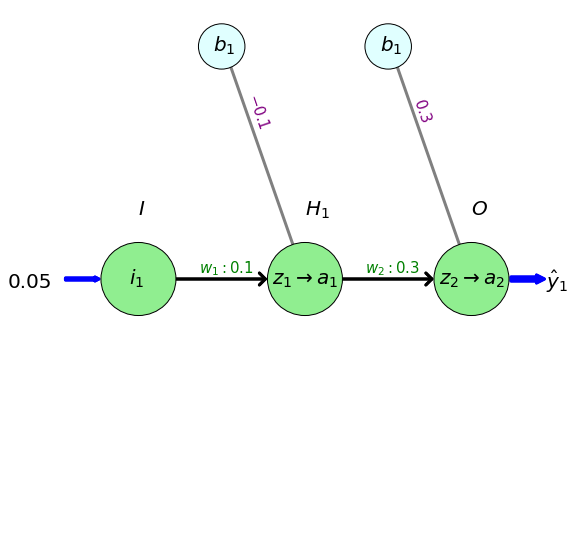

In [22]:
figExercise

### Backward pass 3
$\begin{eqnarray}
\frac{\partial z_2}{\partial a_1} 
&=&  \frac{\partial w_2*a_1+b_1}{\partial a} = w_2\\
\\
\frac{\partial L(w,b|x)}{\partial a_1} 
&=&  \frac{\partial z_2}{\partial a_1} \times \frac{\partial L(w,b|x)}{\partial z_2}
\end{eqnarray}$

In [23]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [24]:
tab2["dz2da1"] = [format(dz2da1, ".2g").ljust(6, ".")]
tab2["dcda1"] = [format(dcda1, ".2g").ljust(13, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

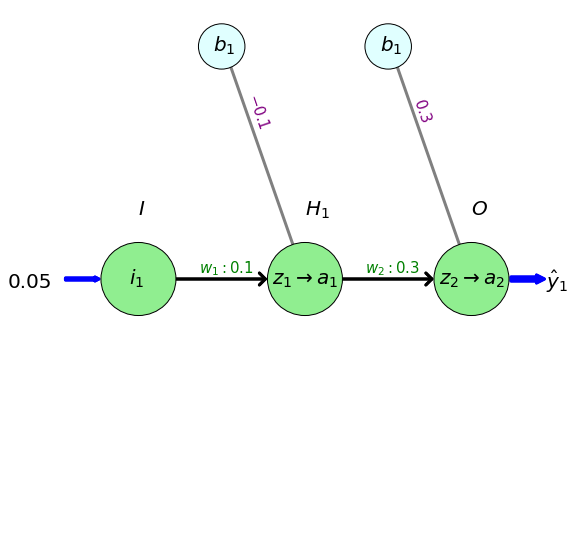

In [25]:
figExercise

### Backward pass 4
$\begin{eqnarray}
\frac{\partial a_1}{\partial z_1} 
&=&  \frac{\partial \sigma(z_1)}{\partial a_1} \\
&=& \sigma(z_1)(1-\sigma(z_1))\\
\\
\frac{\partial L(w,b|x)}{\partial z_1} 
&=&  \frac{\partial a_1}{\partial z_1} \times \frac{\partial L(w,b|x)}{\partial a_1}
\end{eqnarray}$

In [26]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [27]:
tab2["dz2da1"] = [format(dz2da1, ".2g").ljust(6, ".")]
tab2["dcda1"] = [format(dcda1, ".2g").ljust(13, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

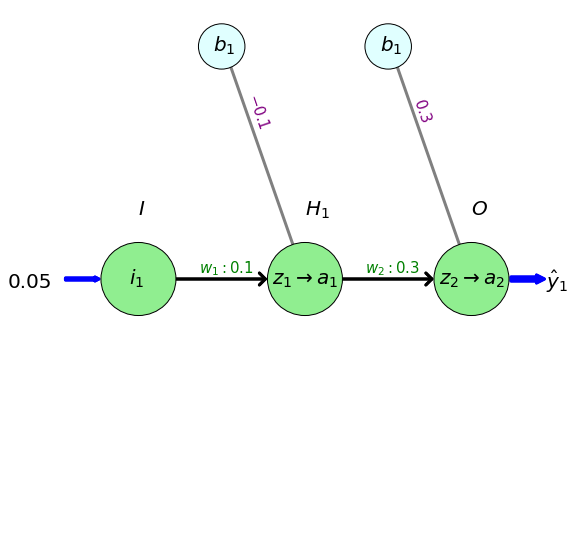

In [28]:
figExercise

### Backward pass 4
$\begin{eqnarray}
\frac{\partial a_1}{\partial z_1} 
&=&  \frac{\partial \sigma(z_1)}{\partial a_1} \\
&=& \sigma(z_1)(1-\sigma(z_1))\\
\\
\frac{\partial L(w,b|x)}{\partial z_1} 
&=&  \frac{\partial a_1}{\partial z_1} \times \frac{\partial L(w,b|x)}{\partial a_1}
\end{eqnarray}$

In [29]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [30]:
tab2["da1dz1"] = [format(da1dz1, ".2g").ljust(6, ".")]
tab2["dcdz1"] = [format(dcdz1, ".2g").ljust(12, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

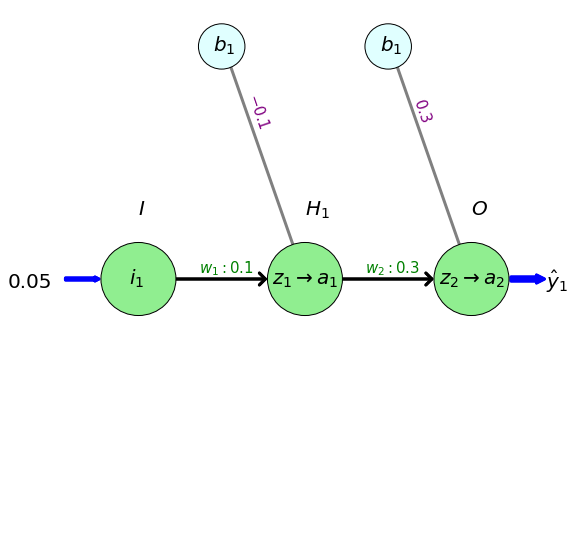

In [31]:
figExercise

### Backward pass 5
$\begin{eqnarray}
\frac{\partial z_1}{\partial w_1} &=&  \frac{\partial w_1a_1+b_1}{\partial a_1} = ?\\
\\
\frac{\partial L(w_1,b|x)}{\partial z_1} 
&=&  \frac{\partial z_1}{\partial w_1} \times \frac{\partial L(w_1,b|x)}{\partial z_1}
\end{eqnarray}$

In [32]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [33]:
tab2["da1dz1"] = [format(da1dz1, ".2g").ljust(6, ".")]
tab2["dcdz1"] = [format(dcdz1, ".2g").ljust(12, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

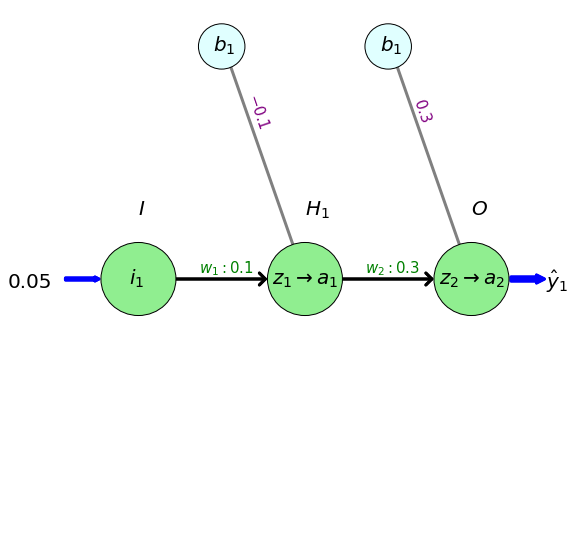

In [31]:
figExercise

### Backward pass 5
$\begin{eqnarray}
\frac{\partial z_1}{\partial w_1} &=&  \frac{\partial w_1a_1+b_1}{\partial a_1} = a_1\\
\\
\frac{\partial L(w_1,b|x)}{\partial z_1} 
&=&  \frac{\partial z_1}{\partial w_1} \times \frac{\partial L(w_1,b|x)}{\partial z_1}
\end{eqnarray}$

In [32]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [33]:
tab2["da1dz1"] = [format(da1dz1, ".2g").ljust(6, ".")]
tab2["dcdz1"] = [format(dcdz1, ".2g").ljust(12, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

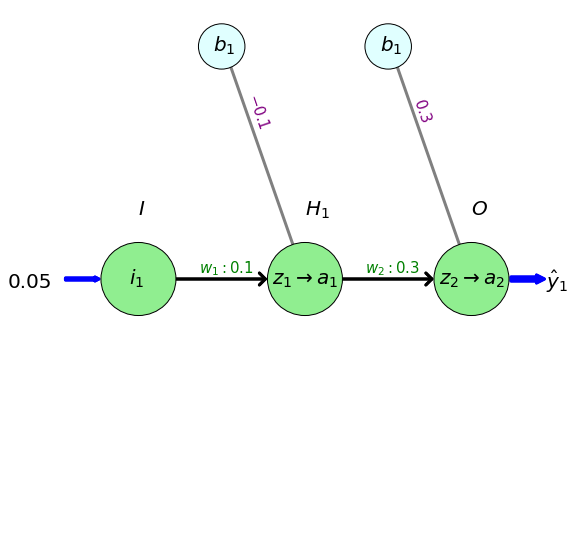

In [34]:
figExercise

### Backward pass 5
$\begin{eqnarray}
\frac{\partial z_1}{\partial w_1} &=&  \frac{\partial w_1a_1+b_1}{\partial a_1} = a_1\\
\\
\frac{\partial L(w_1,b|x)}{\partial z_1} 
&=&  \frac{\partial z_1}{\partial w_1} \times \frac{\partial L(w_1,b|x)}{\partial z_1}
\end{eqnarray}$

In [35]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [36]:
tab2["dz1dw1"] = [format(dz1dw1, ".2g").ljust(6, ".")]
tab2["dcdw1"] = [format(dcdw1, ".2g").ljust(12, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2

$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.0024......,0.05..,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

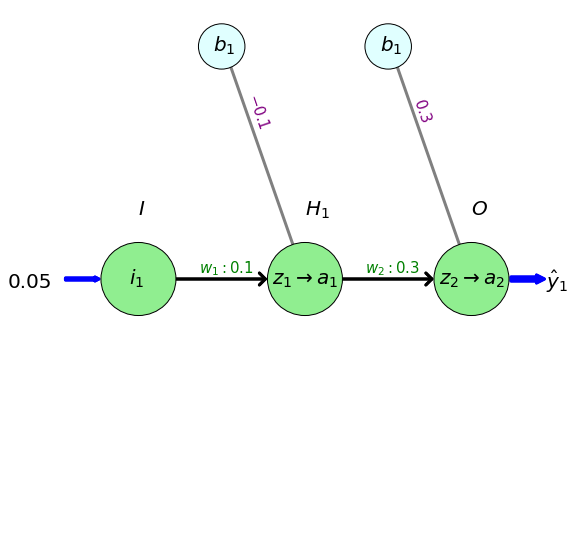

In [37]:
figExercise

### Update $w_1$
Let $\eta=$ {{ eta }}, then 

$\begin{eqnarray}
w'_1 &=& w_1 - \eta \frac{\partial L(w_1,b|x)}{\partial z_1}
\end{eqnarray}$

In [38]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [39]:
tab2["dz1dw1"] = [format(dz1dw1, ".2g").ljust(6, ".")]
tab2["dcdw1"] = [format(dcdw1, ".2g").ljust(12, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2

$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.0024......,0.05..,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

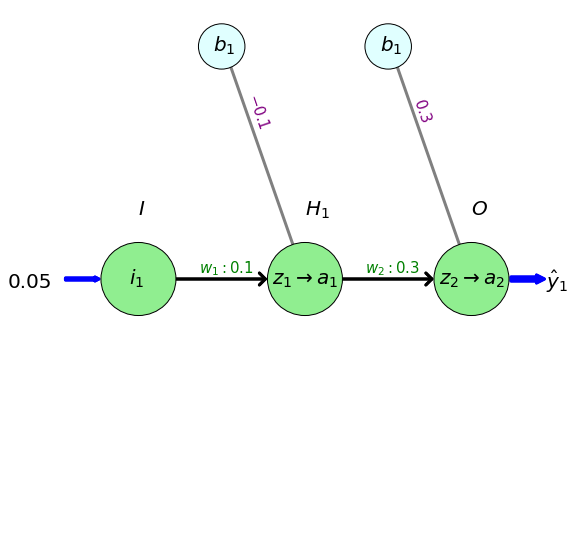

In [40]:
figExercise

### Update $w_1$
Let $\eta=$ {{ eta }}, then 

$\begin{eqnarray}
w'_1 &=& w_1 - \eta \frac{\partial L(w_1,b|x)}{\partial z_1}
\end{eqnarray}$

In [41]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [42]:
tab2["wnew"] = [format(wnew, ".2g").ljust(6, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).\
style.hide_index().\
set_table_styles(styles)
stab2

$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
0.099.,0.0024......,0.05..,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# More neurons per layer

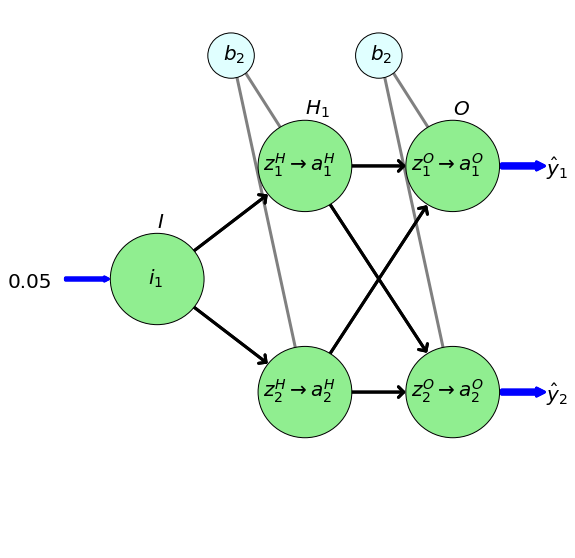

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from draw_neural_net import draw_neural_net

#-----1-1-1
layer_sizes = [1,2,2]

weights = [
    np.array(
        [
            ["w_{}"]
         ]
    ),
    np.array(
        [
            [ "w_2:{}".format(w2)]
        ]
    )
]
biases = [
    np.array(
        ["{}".format(b1)]
    ), 
    np.array(
        ["{}".format(b2)]
    )
]

hidden = [
                np.array(
                [ r"$i_1$"]
                ),
                np.array(
                    [
                        r"$z_1^H\rightarrow a_1^H$",
                        r"$z_2^H\rightarrow a_2^H$"
                    ]
                ),
                np.array(
                    [
                        r"$z_1^O\rightarrow a_1^O$",
                        r"$z_2^O\rightarrow a_2^O$"
                    ]
                ),
]

figExercise2 = plt.figure(figsize=(10, 10))
ax = figExercise2.gca()
ignore=ax.axis('off')

draw_neural_net(ax, 
                layerSizes = layer_sizes, 
                #weights = weights,
                otherNodePrefix = hidden,
                #biases=biases, 
                inputPrefix = ["{}".format(x)], 
                nodeFontSize=20, edgeFontSize = 15, edgeWidth = 3
               )
#plt.show()

#### Output layer
- Same as with one neuron

#### Hidden layer
- Need to sum over neurons in next layer, e.g.:
$\frac{\partial L(w,b|x)}{\partial a^H_i}  = \sum_j w_{i,j}\frac{\partial L(w,b|x)}{\partial z_j^O}$

#### What does Tensorflow do?
- Improve computation efficiency using matrix algebra

1. Per layer, collect
    - partial derivatives as gradients 
    - weights as matrix

2. Over training data, collect
    - *tensors* of gradients
    - *tensors* of weight matrices

#### "Tensors flows through the network!"

(tensors $\approx$ "matrices of any dimension")

# Summary -- Back-propagation

##### Efficient computation of partial derivatives $\frac{\partial L(w,b|x)}{\partial v}, v\in w\cup b$

+ Chain rule allows computing partial derivatives layer-wise, backwards
+ By collecting gradients and weights for layers in *tensors* over all training data, all computations in one epoch can be computed at the ame time for all training data

In [ ]:
figExercise